# Analysis of RPM K5-Cre vs CGRP-Cre primary tumors
## Ireland et al 2025
### Related to Extended Data Fig. 2e-i

Modified from `Fig1_ExtFig2_RPMK5vsCGRP_Final_Clean.ipynb`

In [1]:
#Import relevant packages
import numpy as np
import pandas as pd
from matplotlib import rcParams
import os
import scanpy as sc

import matplotlib as mpl
import matplotlib.pyplot as plt

#For nice color schemes
import cmocean

#For barplots
import seaborn as sns

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, dpi_save=300, facecolor='white')

### Load data

In [3]:
adata_3 = sc.read_h5ad("../data/021825_RPM_CGRPvK5_adata3.h5ad")

In [4]:
adata_3

AnnData object with n_obs × n_vars = 27674 × 55491
    obs: 'Genotype', 'Cre', 'GenoCre', 'UnID', 'Batch', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'n_genes', 'log1p_total_counts', 'leiden_scVI_1.1', 'cluster', 'leiden_scVI_1.2', 'leiden_scVI_1.3'
    var: 'gene_ids', 'feature_types', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean_', 'frac_zero', 'highly_variable_nbatches'
    uns: 'Batch_colors', 'GenoCre_colors', 'Genotype_colors', 'UnID_colors', 'hvg', 'leiden', 'leiden_scVI_1.1_colors', 'leiden_scVI_1.2_colors', 'leiden_scVI_1.3_colors', 'log1p', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI_1.1', 'X_scVI_1.2', 'X_scVI_1.3', 'X_umap'
    varm: 'df_poisson'
    layers: 'counts', 'norm'
    obsp: 'connectivities', 'distances'

### Show UMAP plots of data

#### UMAP by genotype

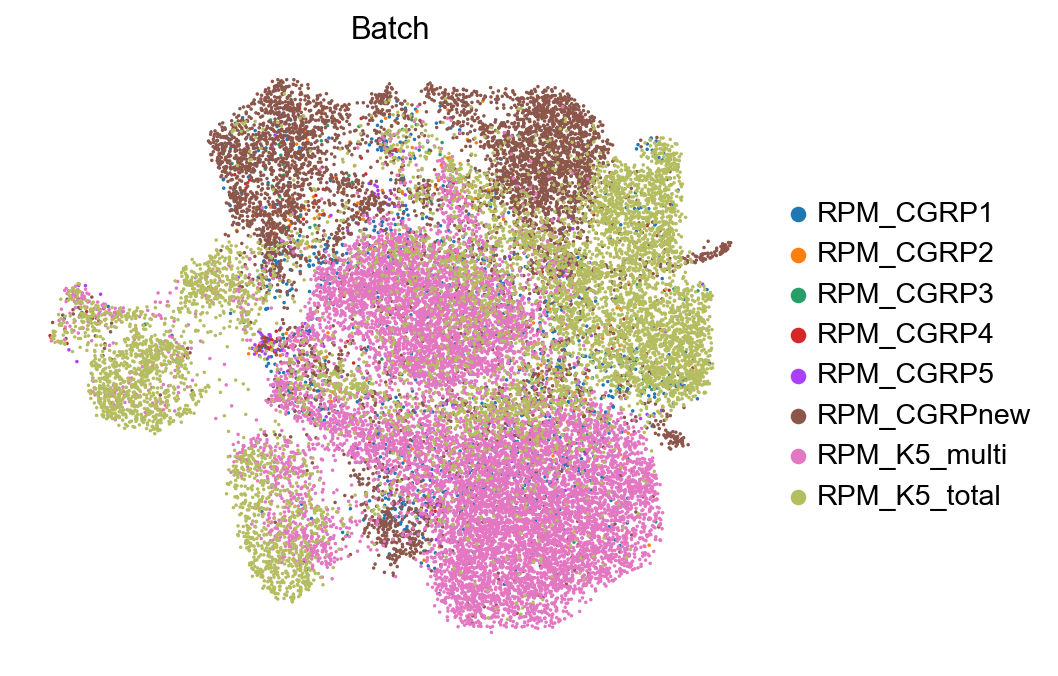

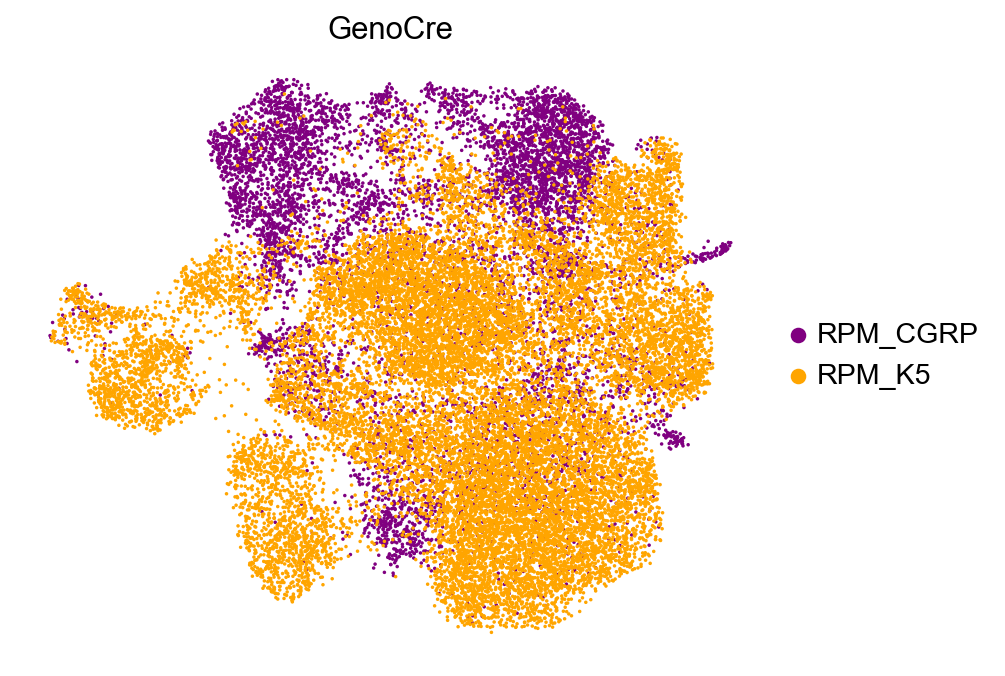

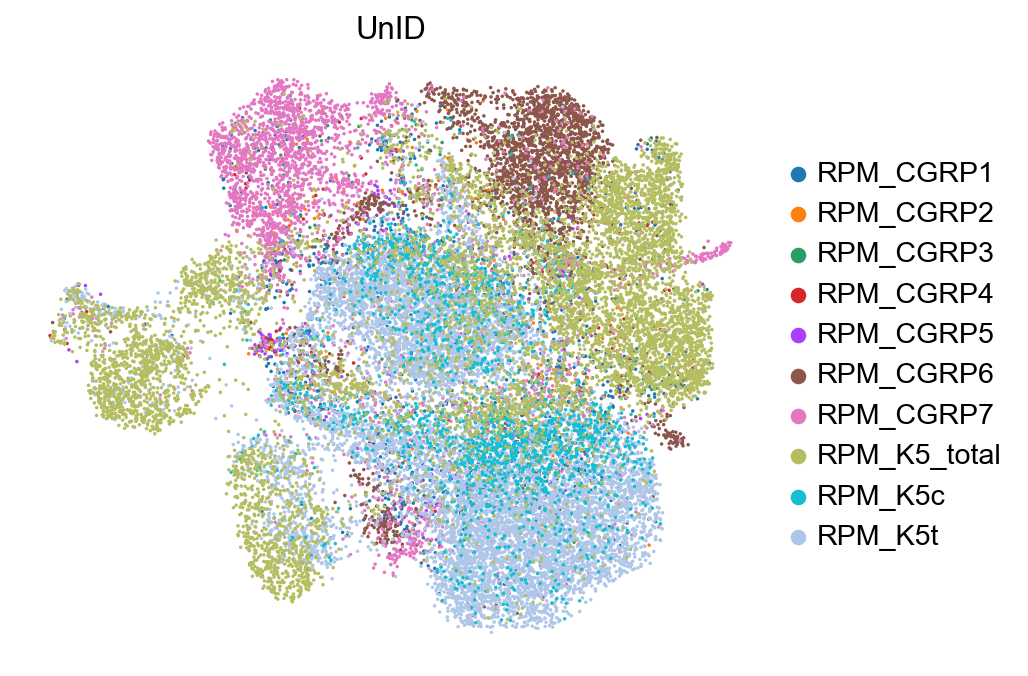

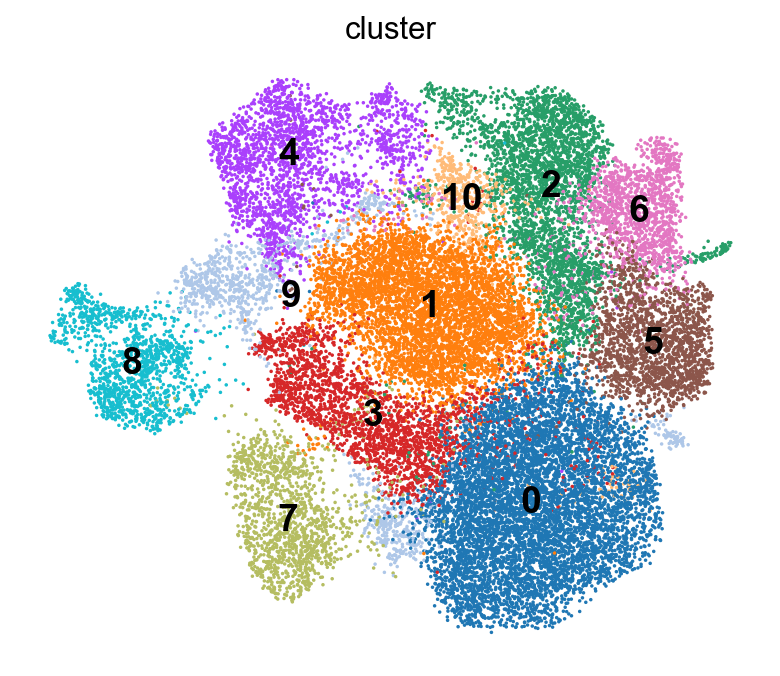

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))
sc.pl.umap(adata_3, color="Batch", cmap="cmo.matter", s=10, ax=ax, vmax="p99.99", frameon=False, save=False)
fig, ax = plt.subplots(figsize=(6, 5))
sc.pl.umap(adata_3, color="GenoCre", legend_loc="right margin", ax=ax, s=10, frameon=False, save=False, palette=['purple','orange'])
fig, ax = plt.subplots(figsize=(6, 5))
sc.pl.umap(adata_3, color="UnID", legend_loc="right margin", ax=ax, s=10, frameon=False, save=False)
fig, ax = plt.subplots(figsize=(6, 5))
sc.pl.umap(adata_3, color="cluster", legend_loc="on data", legend_fontsize='large',ax=ax, s=10, frameon=False, save=False)


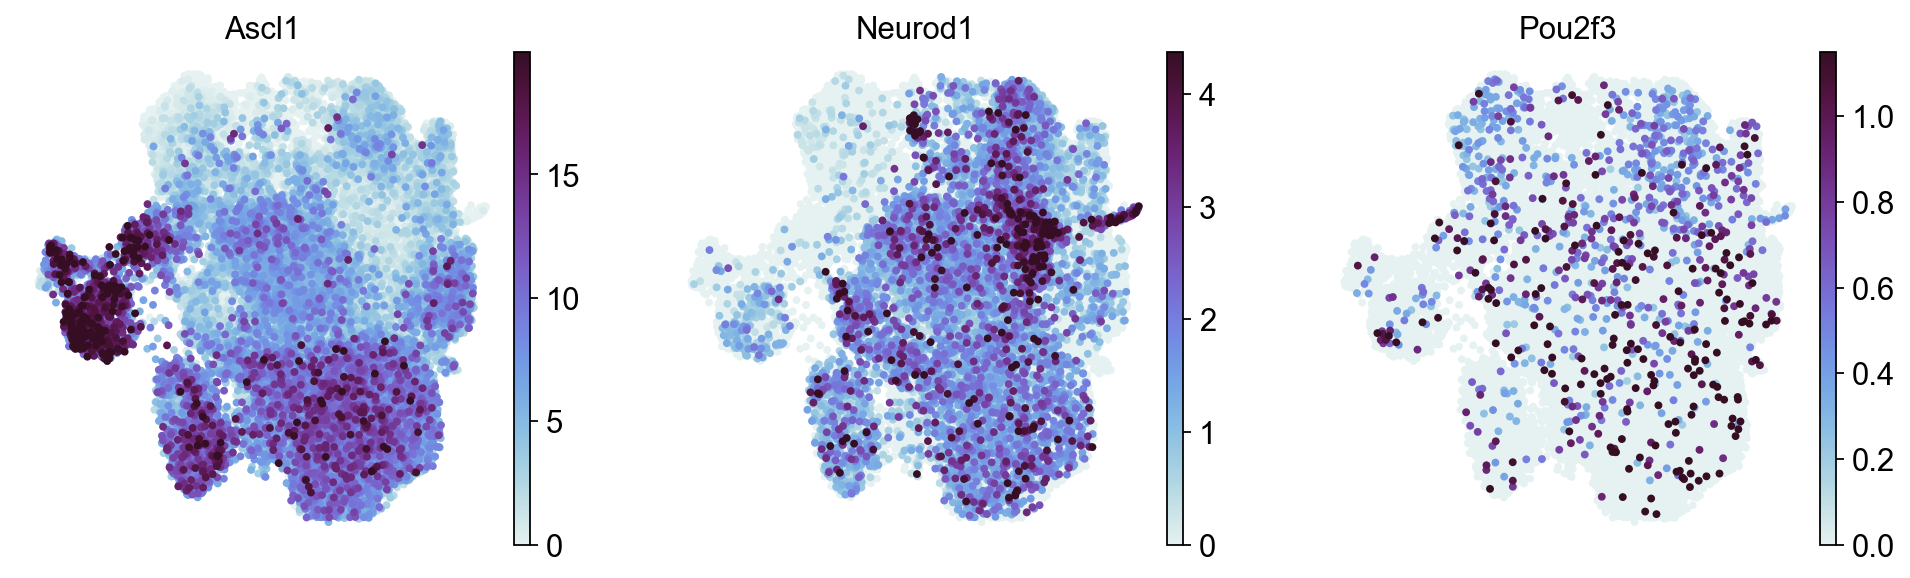

In [6]:
more_types=["Ascl1","Neurod1","Pou2f3"] # Tumor markers

sc.pl.umap(
    adata_3,
    color=more_types,
    use_raw=False,
    legend_loc= "on data",
    color_map="cmo.dense",
    ncols=3,
    vmax="p99.5",s=50,
    frameon=False,
    layer="norm",
    save=False
)

In [7]:
#Generate signatures from these two tumors after normalizing and log transforming count data 
sc.pp.normalize_total(adata_3)
# sc.pp.log1p(adata_3)
sc.pp.pca(adata_3, n_comps=50)
sc.tl.rank_genes_groups(adata_3, groupby="leiden_scVI_1.3", method="wilcoxon")

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:10)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:21)


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_scVI_1.3']`


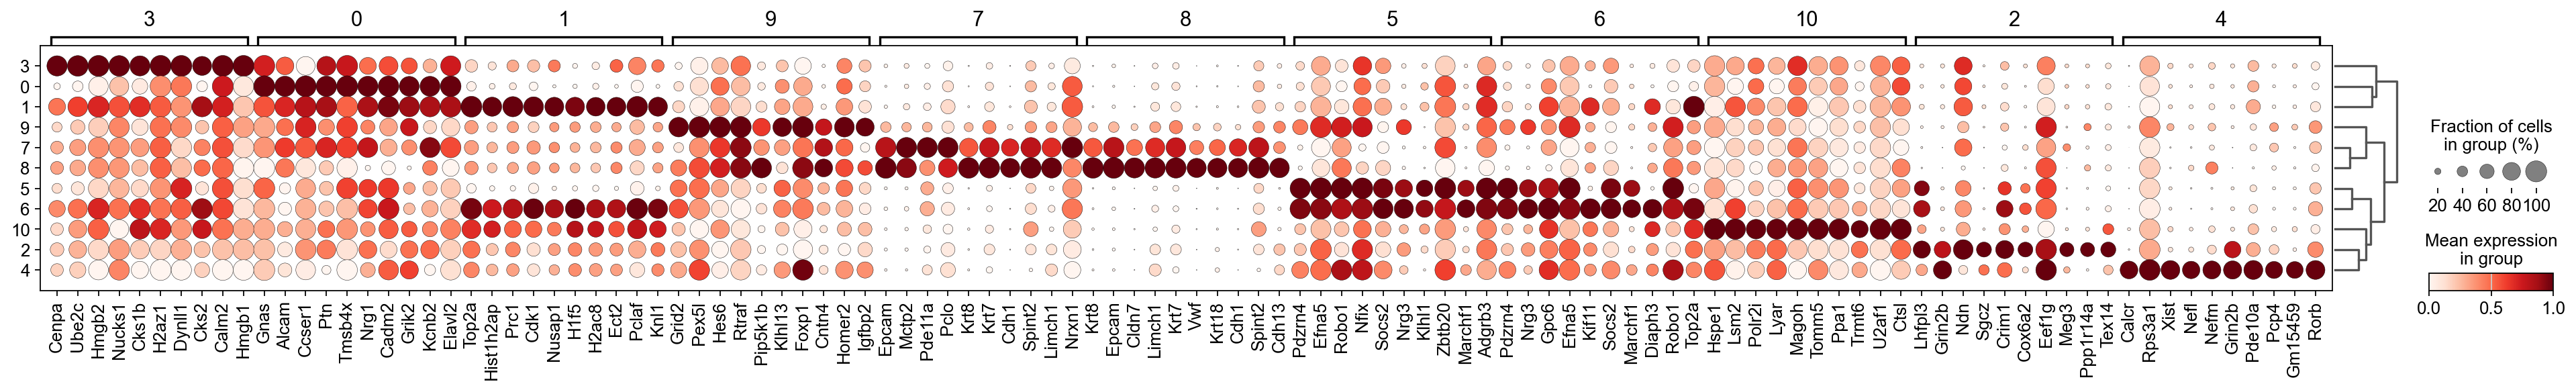

In [8]:
sc.pl.rank_genes_groups_dotplot(adata_3, n_genes=10,figsize=[30,3], standard_scale='var')
